In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [2]:
from sklearn.cluster import KMeans

In [ ]:
kospi=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_preprocessed.csv',encoding='cp949',index_col=0)

In [ ]:
kospi

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-11,2016-02-12,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-29,2016-03-02,2016-03-03,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29
한화생명,0.879083,0.884642,0.886032,0.863794,0.863794,0.835997,0.840167,0.842946,0.816539,0.813760,0.815149,0.838777,0.816539,0.812370,0.830438,0.820709,0.806810,0.841557,0.826268,0.838777,0.848506,0.851286,0.835997,0.835997,0.842946,0.816539,0.822099,0.831828,0.808200,0.820709,0.824878,0.816539,0.809590,0.809590,0.770674,0.763725,0.740097,0.726199,0.731758,0.751216,...,0.084086,0.080612,0.082696,0.078527,0.088256,0.094510,0.102154,0.104239,0.100069,0.082001,0.093120,0.082696,0.081306,0.080612,0.095900,0.093815,0.086171,0.087561,0.088256,0.097290,0.094510,0.095900,0.092425,0.095900,0.100764,0.093815,0.093120,0.093815,0.097290,0.094510,0.095205,0.092425,0.093120,0.089646,0.083391,0.083391,0.075747,0.077832,0.081306,0.087561
미래에셋대우,0.683744,0.678684,0.653384,0.602783,0.617963,0.571157,0.563567,0.592663,0.558507,0.518027,0.518027,0.519292,0.478811,0.481341,0.529412,0.530677,0.505376,0.525617,0.529412,0.535737,0.557242,0.530677,0.495256,0.534472,0.553447,0.492726,0.462366,0.509171,0.519292,0.514231,0.525617,0.515497,0.520557,0.523087,0.519292,0.524352,0.531942,0.555977,0.562302,0.569892,...,0.625553,0.678684,0.663504,0.659709,0.745731,0.738140,0.731815,0.744466,0.702720,0.686275,0.717900,0.669829,0.712840,0.724225,0.771031,0.754586,0.729285,0.745731,0.721695,0.758381,0.781151,0.774826,0.740670,0.759646,0.739405,0.696395,0.698925,0.728020,0.725490,0.719165,0.706515,0.698925,0.709045,0.667299,0.621758,0.645794,0.604048,0.601518,0.611638,0.617963
기업은행,0.545455,0.576346,0.563107,0.536628,0.536628,0.518976,0.496911,0.501324,0.496911,0.452780,0.466019,0.452780,0.426302,0.430715,0.448367,0.466019,0.439541,0.474846,0.492498,0.496911,0.505737,0.488085,0.452780,0.466019,0.518976,0.483672,0.461606,0.518976,0.523389,0.558694,0.545455,0.527802,0.523389,0.523389,0.518976,0.523389,0.523389,0.510150,0.527802,0.532215,...,0.205649,0.202118,0.213592,0.208297,0.223301,0.248014,0.258605,0.260371,0.249779,0.214475,0.222418,0.198588,0.204766,0.212710,0.225066,0.218888,0.207414,0.210944,0.195940,0.203001,0.207414,0.213592,0.205649,0.211827,0.208297,0.199470,0.205649,0.203883,0.205649,0.203001,0.201236,0.198588,0.187996,0.187996,0.177405,0.180053,0.169462,0.174757,0.180053,0.188879
SK하이닉스,0.055521,0.061199,0.063091,0.056151,0.049842,0.036593,0.025868,0.029653,0.027129,0.013249,0.011987,0.032177,0.013249,0.010726,0.017666,0.028391,0.026498,0.023975,0.023975,0.019558,0.033438,0.034069,0.021451,0.029653,0.029653,0.017666,0.020189,0.024606,0.039748,0.054259,0.056151,0.048580,0.052366,0.058675,0.064984,0.063722,0.063722,0.053628,0.065615,0.078233,...,0.704732,0.693375,0.698423,0.692114,0.702208,0.700946,0.697161,0.693375,0.687066,0.660568,0.621451,0.581073,0.615142,0.627760,0.646688,0.669401,0.673186,0.656782,0.622713,0.623975,0.627760,0.668139,0.668139,0.664353,0.676972,0.650473,0.641640,0.664353,0.684543,0.708517,0.703470,0.712303,0.731230,0.741325,0.700946,0.729968,0.738801,0.721136,0.716088,0.735016
한국전력공사,0.721925,0.736898,0.739037,0.728342,0.719786,0.736898,0.732620,0.764706,0.764706,0.743316,0.734759,0.756150,0.754011,0.732620,0.717647,0.734759,0.756150,0.758289,0.779679,0.777540,0.790374

In [ ]:
kospi=kospi.fillna(kospi.mean())

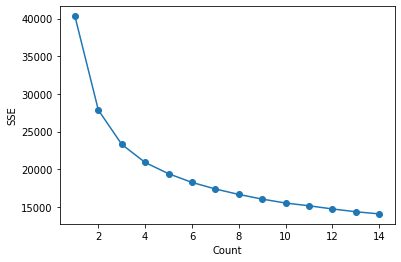

In [ ]:
#model 평가
def elbow(X):
  sse=[]
  for i in range(1,15):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

  plt.plot(range(1,15),sse,marker='o')
  plt.xlabel('Count')
  plt.ylabel('SSE')
  plt.show()

elbow(kospi)

In [ ]:
model=KMeans(n_clusters=4)
model.fit(kospi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.cluster_centers_

array([[0.28375907, 0.28799743, 0.28786984, ..., 0.35623486, 0.37415433,
        0.38573569],
       [0.64558778, 0.6477074 , 0.64311043, ..., 0.28051299, 0.29085287,
        0.29903828],
       [0.66278745, 0.66850597, 0.67469444, ..., 0.21317274, 0.22102096,
        0.22600583],
       [0.16154111, 0.16390512, 0.16767227, ..., 0.46291097, 0.48008319,
        0.49226228]])

In [ ]:
print(model.labels_)

[1 1 1 0 2 1 0 1 1 0 1 3 1 2 1 1 0 0 1 2 2 0 1 1 1 1 0 1 0 0 1 0 1 1 2 2 1
 0 1 2 1 2 1 1 0 0 2 0 1 0 2 1 1 2 0 1 1 3 1 1 0 2 2 0 1 1 3 0 3 3 0 1 0 0
 1 1 0 0 1 0 3 2 1 2 0 3 1 0 0 1 0 0 0 2 0 1 1 1 3 0 2 0 1 0 1 1 2 0 2 0 3
 1 1 1 1 1 0 3 2 0 2 0 0 2 0 1 0 2 2 1 1 3 0 1 2 1 2 2 2 2 2 0 3 2 1 1 0 3
 1 0 1 1 0 2 2 1 2 2 3 0 2 3 1 1 0 1 2 3 2 0 1 1 0 1 2 3 1 2 2 2 2 2 0 1 1
 0 0 1 1 0 0 2 2 3 1 1 3 1 1 3 3 2 2 2 2 0 1 1 2 3 0 2 0 3 1 1 3 1 3 2 0 1
 1 2 1 0 2 2 1 1 1 2 2 1 1 3 0 2 0 3 1 3 1 1 1 1 1 1 0 2 1 1 2 1 0 2 2 1 3
 0 1 3 0 1 1 2 3 1 2 2 2 1 0 2 2 2 2 2 2 1 1 1 0 0 1 2 3 0 0 0 2 1 1 0 2 2
 1 2 1 2 2 3 3 3 1 2 0 0 2 0 1 2 3 3 0 3 2 2 2 0 1 2 2 2 2 2 0 3 1 1 2 2 3
 2 2 3 1 1 2 3 3 2 0 0 0 3 1 1 0 1 2 2 1 3 0 3 1 0 0 3 3 1 1 2 1 0 0 3 0 2
 2 1 1 3 3 3 1 2 1 0 1 2 1 0 3 3 1 2 2 1 2 1 2 0 0 0 0 3 2 0 1 2 3 3 0 1 0
 2 2 2 1 1 0 2 2 3 1 1 1 3 2 3 1 0 3 2 0 0 1 2 0 1 2 1 2 3 0 1 1 0 2 2 1 2
 3 0 3 2 1 1 1 0 3 1 2 1 2 2 3 3 0 2 1 3 2 3 2 0 2 2 1 1 1 2 2 0 1 3 1 1 2
 0 3 1 2 1 1 3 3 0 0 3 0 

In [ ]:
kospi['Cluster']=model.labels_

In [ ]:
kospi.to_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_cluster.csv')

## Cluster 평가


In [3]:
cluster=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_cluster_dbc_analysis.csv',encoding='cp949',index_col=0)

In [4]:
cluster

,Cluster,업종,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-11,2016-02-12,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-29,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29
SK하이닉스,0,반도체 제조업,0.055521,0.061199,0.063091,0.056151,0.049842,0.036593,0.025868,0.029653,0.027129,0.013249,0.011987,0.032177,0.013249,0.010726,0.017666,0.028391,0.026498,0.023975,0.023975,0.019558,0.033438,0.034069,0.021451,0.029653,0.029653,0.017666,0.020189,0.024606,0.039748,0.054259,0.056151,0.048580,0.052366,0.058675,0.064984,0.063722,0.063722,0.053628,...,0.704732,0.693375,0.698423,0.692114,0.702208,0.700946,0.697161,0.693375,0.687066,0.660568,0.621451,0.581073,0.615142,0.627760,0.646688,0.669401,0.673186,0.656782,0.622713,0.623975,0.627760,0.668139,0.668139,0.664353,0.676972,0.650473,0.641640,0.664353,0.684543,0.708517,0.703470,0.712303,0.731230,0.741325,0.700946,0.729968,0.738801,0.721136,0.716088,0.735016
LG유플러스,0,전기 통신업,0.136461,0.125800,0.131130,0.141791,0.141791,0.120469,0.115139,0.113006,0.102345,0.105544,0.100213,0.072495,0.030917,0.020256,0.025586,0.042644,0.035181,0.043710,0.031983,0.081023,0.069296,0.040512,0.018124,0.034115,0.023454,0.000000,0.028785,0.043710,0.047974,0.076759,0.097015,0.091684,0.125800,0.115139,0.125800,0.141791,0.141791,0.184435,...,0.264392,0.259062,0.275053,0.285714,0.349680,0.317697,0.371002,0.360341,0.360341,0.301706,0.312367,0.275053,0.312367,0.328358,0.371002,0.365672,0.339019,0.344350,0.323028,0.333689,0.339019,0.328358,0.307036,0.317697,0.328358,0.312367,0.317697,0.317697,0.339019,0.323028,0.312367,0.312367,0.296375,0.275053,0.259062,0.253731,0.221748,0.200426,0.237740,0.275053
KB금융,0,기타 금융업,0.150411,0.155112,0.150411,0.141011,0.142186,0.130435,0.131610,0.146886,0.116334,0.092832,0.096357,0.077556,0.052879,0.055229,0.071680,0.084606,0.069330,0.086957,0.099882,0.105758,0.090482,0.077556,0.056404,0.062280,0.077556,0.062280,0.055229,0.084606,0.081081,0.123384,0.108108,0.099882,0.095182,0.095182,0.098707,0.089307,0.092832,0.085781,...,0.222092,0.222092,0.246769,0.237368,0.260870,0.299647,0.336075,0.363102,0.323149,0.284371,0.280846,0.244418,0.251469,0.256169,0.279671,0.259694,0.256169,0.280846,0.253819,0.266745,0.273796,0.266745,0.256169,0.286722,0.276146,0.269095,0.270270,0.260870,0.287897,0.289072,0.278496,0.279671,0.274971,0.272620,0.267920,0.270270,0.262045,0.285546,0.285546,0.270270
NH투자증권,0,금융 지원 서비스업,0.305400,0.309125,0.283985,0.256983,0.267225,0.247672,0.233706,0.275605,0.254190,0.236499,0.229981,0.232775,0.203911,0.201117,0.241155,0.245810,0.244879,0.271881,0.297020,0.297020,0.315642,0.322160,0.287709,0.300745,0.316574,0.273743,0.233706,0.266294,0.277467,0.266294,0.284916,0.279330,0.279330,0.291434,0.293296,0.299814,0.305400,0.323091,...,0.261639,0.265363,0.280261,0.261639,0.295158,0.300745,0.320298,0.318436,0.298883,0.276536,0.287709,0.250466,0.254190,0.248603,0.286778,0.272812,0.254190,0.268156,0.246741,0.260708,0.292365,0.291434,0.272812,0.286778,0.281192,0.268156,0.276536,0.275605,0.284916,0.294227,0.299814,0.280261,0.280261,0.269088,0.254190,0.256052,0.244879,0.256983,0.257914,0.263501
하나금융지주,0,기타 금융업,0.120108,0.129555,0.130904,0.113360,0.118758,0.097166,0.098516,0.099865,0.097166,0.062078,0.067476,0.062078,0.032389,0.043185,0.053981,0.062078,0.040486,0.053981,0.071525,0.079622,0.071525,0.070175,0.053981,0.070175,0.1

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sector=cluster.groupby('Cluster').cluster.sum()
sector

AttributeError: ignored

In [ ]:
#http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView